In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import mca
import prince

In [3]:
grade = pd.read_csv("original_data/grade_numeric.csv")
survey = pd.read_csv("original_data/survey.csv")

C:\Users\Eren\AppData\Local\Temp/ipykernel_12608/4145723399.py:2: DtypeWarning: Columns (314,391,392,789,791,792,1124,1125,1227,1228,1231,1232,1477,1478,1554,1555,1556,1557,1558,1559,1561,1568,1571,1678,1687,1745,1746,1818,1836,1837,1843,1844,1849,1851,1852,1853,2072,2116,2117,2264,2266,2280,2281,2282,2283,2289,2290,2483,2484,2501,2502,2508,2509,2699,2711,2712,2830) have mixed types. Specify dtype option on import or set low_memory=False.
  survey = pd.read_csv("original_data/survey.csv")


In [4]:
grade_survey = pd.merge(grade, survey, on=['egoid'])
grade_survey.to_csv('merged_data/grade_survey.csv', index=False)

# grade_survey = pd.read_csv('merged_data/grade_survey.csv')

In [10]:
# grade_survey = grade_survey.dropna()

<AxesSubplot:>

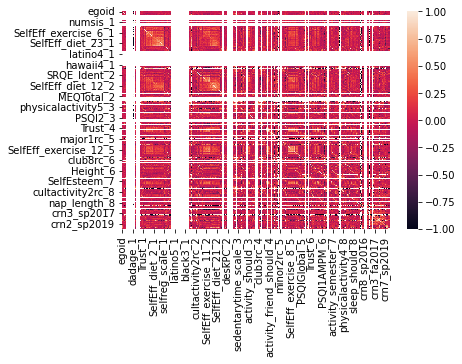

In [7]:
sns.heatmap(grade_survey.corr())

In [42]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = []
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.append((cols[i], cols[j], df.iat[i, j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    abs_corr = df.corr().abs()
    # au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(abs_corr)
    return sorted(labels_to_drop, key=lambda tup: tup[2], reverse=True)
    # au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    # return au_corr[0:n]

In [34]:
grade_survey.corr()

,egoid,grade,course,AcademicPeriod,major1rc_1,major2rc_1,hsclub1rc_1,hsclub2rc_1,hsclub3rc_1,hsclub4rc_1,...,gpa_fa2016,gpa_sp2017,gpa_fa2017,gpa_fa2018,gpa_sp2019,gpa_su2019,reshallyear1,reshallyear2,reshallyear3,reshallyear4
egoid,1.000000,0.003707,-0.001469,0.006247,-0.051059,-0.228019,0.022711,0.031417,0.050068,-0.021385,...,-0.008396,-0.024004,0.026656,0.029827,0.040328,-0.449709,-0.050269,-0.066137,-0.079497,-0.010271
grade,0.003707,1.000000,0.074334,0.086713,0.076361,-0.047227,-0.059552,0.022890,0.031791,0.012376,...,0.436919,0.469439,0.424127,0.445323,0.413221,0.516479,0.066016,0.059234,0.066064,0.065594
course,-0.001469,0.074334,1.000000,0.050716,-0.018174,-0.015530,0.009258,-0.002471,-0.006400,0.005951,...,-0.005141,-0.016399,-0.005012,-0.022695,-0.015571,0.036563,0.009274,0.011696,-0.000248,-0.023747
AcademicPeriod,0.006247,0.086713,0.050716,1.000000,-0.012533,-0.003005,0.021535,0.010501,-0.006644,0.001700,...,-0.016710,-0.012618,-0.003314,-0.004957,-0.002884,-0.044311,0.000696,0.001779,0.001204,0.008342
major1rc_1,-0.051059,0.076361,-0.018174,-0.012533,1.000000,0.015688,0.007351,0.082562,-0.053444,0.025325,...,0.112519,0.177344,0.121839,0.144858,0.098991,0.433925,0.162406,0.179055,0.167762,0.184648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gpa_su2019,-0.449709,0.516479,0.036563,-0.044311,0.433925,-0.238086,0.021674,-0.262903,0.159368,0.037512,...,0.878841,0.806776,0.351508,0.700846,0.535509,1.000000,-0.146604,-0.120366,-0.243932,-0.235773
reshallyear1,-0.050269,0.066016,0.009274,0.000696,0.162406,0.139366,0.033299,0.045007,0.042043,0.073209,...,0.080713,0.160787,0.188970,0.175725,0.179427,-0.146604,1.000000,0.988895,0.987013,0.977707
reshallyear2,-0.066137,0.059234,0.011696,0.001779,0.179055,0.169905,0.033566,0.042543,0.025333,0.075718,...,0.075042,0.148297,0.167595,0.153399,0.146139,-0.120366,0.988895,1.000000,0.997144,0.985318
reshallyear3,-0.079497,0.066064,-0.000248,0.001204,0.167762,0.176173,0.020730,0.033591,0.011849,0.129936,...,0.077169,0.157363,0.175978,0.182281,0.169614,-0.243932,0.987013,0.997144,1.000000,0.988948


In [43]:
get_top_abs_correlations(grade_survey)

[('egoid', 'egoid', 1.0),
 ('grade', 'grade', 1.0),
 ('course', 'course', 1.0),
 ('AcademicPeriod', 'AcademicPeriod', 1.0),
 ('major1rc_1', 'major1rc_1', 1.0),
 ('major2rc_1', 'major2rc_1', 1.0),
 ('hsclub1rc_1', 'hsclub1rc_1', 1.0),
 ('hsclub2rc_1', 'hsclub2rc_1', 1.0),
 ('hsclub3rc_1', 'hsclub3rc_1', 1.0),
 ('hsclub4rc_1', 'hsclub4rc_1', 1.0),
 ('hsclub5rc_1', 'hsclub5rc_1', 1.0),
 ('numsib_1', 'numsib_1', 1.0),
 ('SelfEff_diet_8_1', 'SelfEff_diet_8_1', 1.0),
 ('selfreg_scale_1', 'selfreg_scale_1', 1.0),
 ('SelfEff_diet_14_2', 'SelfEff_diet_14_2', 1.0),
 ('SelfEff_diet_14_2', 'SelfEff_diet_11_2', 0.6770370332792903),
 ('SelfEff_diet_14_2', 'SelfEff_diet_13_2', 0.6360948569002164),
 ('SelfEff_exercise_scale_2', 'SelfEff_exercise_scale_1', 0.5916901996420136),
 ('SelfEff_diet_14_2', 'SelfEff_diet_12_2', 0.5772618754102559),
 ('SelfEff_diet_9_2', 'SelfEff_diet_24_1', 0.5274261864999154),
 ('SelfEff_diet_14_2', 'SelfEff_diet_9_2', 0.5122515369409999),
 ('SelfEff_diet_14_2', 'SelfEff_diet